# importar recursos

In [2]:
import requests
from bs4 import BeautifulSoup
import csv
import os
import re
import csv
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Definir la ruta del archivo en el escritorio
archivo_csv = os.path.join(os.path.expanduser("~"), "Escritorio", "datos_extraidos.csv")

# Bases de datos periodico las 2 orillas

In [3]:
# Lista de URLs de la base de datos LAS2ORILLAS
BASE_DATOS_las2orillas= [
"https://www.las2orillas.co/2023-y-el-proceso-de-paz-en-el-cauca/",
"https://www.las2orillas.co/la-paz-de-danilo-rueda-que-ya-no-sera-con-el/",
"https://www.las2orillas.co/a-la-paz-total-se-le-atraviesa-una-critica-mas-tecnica-que-politica/",
"https://www.las2orillas.co/educacion-de-la-juventud-y-dia-internacional-de-la-paz/",
"https://www.las2orillas.co/la-paz-ni-total-ni-a-medias/",
"https://www.las2orillas.co/sin-aceptar-al-otro-sera-imposible-la-paz/",
"https://www.las2orillas.co/la-marana-de-la-paz-total/",
"https://www.las2orillas.co/7-anos-del-acuerdo-de-paz-que-transformo-al-pais/",
"https://www.las2orillas.co/asi-se-construye-la-paz/",
"https://www.las2orillas.co/una-paz-a-mordiscos/",
"https://www.las2orillas.co/una-agenda-por-la-paz-en-la-guajira/",
"https://www.las2orillas.co/paz-total-reformas-y-elecciones-la-agenda-politica-para-el-2023/",
"https://www.las2orillas.co/inteligencia-y-universidades-el-refuerzo-necesario-por-la-paz-total/",
"https://www.las2orillas.co/que-implicaciones-tiene-conseguir-la-paz/",
"https://www.las2orillas.co/jovenes-en-paz-y-los-demas-que/",
"https://www.las2orillas.co/sin-politica-social-la-paz-total-sera-solo-de-papel/",
"https://www.las2orillas.co/por-primera-vez-la-paz-esta-en-manos-del-pueblo/",
"https://www.las2orillas.co/por-que-no-habra-paz-total-sin-lineas-rojas/",
"https://www.las2orillas.co/gobierno-eln-es-posible-que-fracase-la-paz-total/",
"https://www.las2orillas.co/que-no-nos-enganen-sin-participacion-ciudadana-no-habra-consecucion-de-la-paz/",
"https://www.las2orillas.co/a-pesar-de-la-ultraderecha-colombiana-hechos-demuestran-que-paz-total-sigue-en-firme/",
"https://www.las2orillas.co/comisionado-de-paz-no-nos-diga-mas-mentiras/"
]

# Definir la función para extraer el autor
def extraer_autor(soup):
    autor_div = soup.find("div", class_="meta-posted-by")
    if autor_div:
        strong_tag = autor_div.find("strong")
        if strong_tag:
            return strong_tag.text.strip()
        # Si no se encuentra el autor en <strong>, intentar extraer desde <a rel="author">
        autor_tag = autor_div.find("a", rel="author")
        if autor_tag:
            return autor_tag.text.strip()
    return "Autor no encontrado"

# Crear una lista para almacenar los datos extraídos
datos_extraidos = []

nombre_periodico = "Las 2 orillas"

# Iterar sobre cada URL de la base de datos
for URL_BASE in BASE_DATOS_las2orillas:
    pedido_obtenido = requests.get(URL_BASE)
    html_obtenido = pedido_obtenido.text
    soup = BeautifulSoup(html_obtenido, "html.parser")

    # Encontrar los elementos <div> con la clase "font--secondary"
    divs = soup.find_all('p')

    # Crear una lista para almacenar los textos del artículo
    texto_articulo = []
    for div in divs:
        texto_articulo.append(div.text.strip())

    # Unir todos los textos del artículo en una cadena
    articulo_completo = " ".join(texto_articulo)

    # Extraer autor
    autor = extraer_autor(soup)

    # Extraer fecha de publicación
    autor_div = soup.find("div", class_="meta-posted-by")
    fecha_meta = autor_div.find("meta", itemprop="datePublished") if autor_div else None
    fecha_span = autor_div.find("span", class_="meta-time") if autor_div else None
    fecha = fecha_meta["content"].strip() if fecha_meta else (fecha_span.text.strip() if fecha_span else "Fecha no encontrada")

    # Contar el número de palabras del artículo
    num_palabras = len(articulo_completo.split())

    # Agregar los datos extraídos a la lista
    datos_extraidos.append([autor, fecha, num_palabras, articulo_completo])

# Crear el DataFrame de pandas con las columnas originales
columnas = ["Autor", "Fecha de Publicación", "Número de Palabras", "Texto del Artículo"]
df = pd.DataFrame(datos_extraidos, columns=columnas)

# Añadir el nombre del periódico a cada entrada
df["Nombre del Periódico"] = nombre_periodico

# Eliminar la columna de texto del artículo
df = df.drop(columns=["Texto del Artículo"])

# Mostrar las tres primeras filas del DataFrame
print(df)

# Escribir los datos extraídos en un archivo CSV
with open('datos_extraidoslas2orillas_descriptivo.csv', 'w', newline='', encoding='utf-8-sig') as archivo:
    escritor_csv = csv.writer(archivo)
    # Escribir la cabecera
    escritor_csv.writerow(["Autor", "Fecha de Publicación", "Número de Palabras", "Nombre del Periódico"])
    # Escribir los datos
    for index, row in df.iterrows():
        escritor_csv.writerow(row)

                                              Autor Fecha de Publicación  \
0                      Leandro Felipe Solarte Nates   diciembre 26, 2023   
1                            Guillermo Segovia Mora    diciembre 6, 2023   
2                 Fredy Alexánder Chaverra Colorado      febrero 7, 2023   
3                              David Auris Villegas      octubre 2, 2023   
4                          Fabio Larrahondo Viáfara   noviembre 15, 2023   
5                                     Gabriel Ángel     octubre 11, 2023   
6                                  Consuelo Ahumada        mayo 30, 2023   
7                            Mónica Tatiana Delgado    noviembre 9, 2023   
8                     Rodrigo Alberto Rúa Hernández      agosto 28, 2023   
9                                 Alejando Carranza   noviembre 18, 2023   
10  Jenny Pilar Álvarez - Corresponsalías Populares        enero 2, 2023   
11                      Tiberio Gutiérrez Echeverri       enero 18, 2023   
12          

# Analisis descriptivo

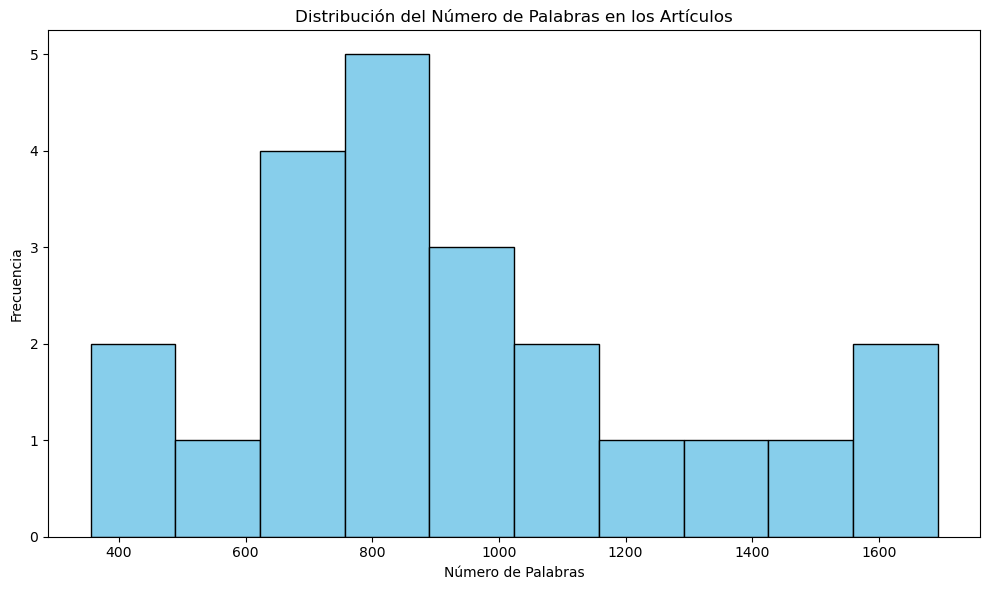

In [31]:
# Gráfica 1: Distribución del Número de Palabras
plt.figure(figsize=(10, 6))
plt.hist(df['Número de Palabras'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Número de Palabras')
plt.ylabel('Frecuencia')
plt.title('Distribución del Número de Palabras en los Artículos')
plt.tight_layout()
plt.show()

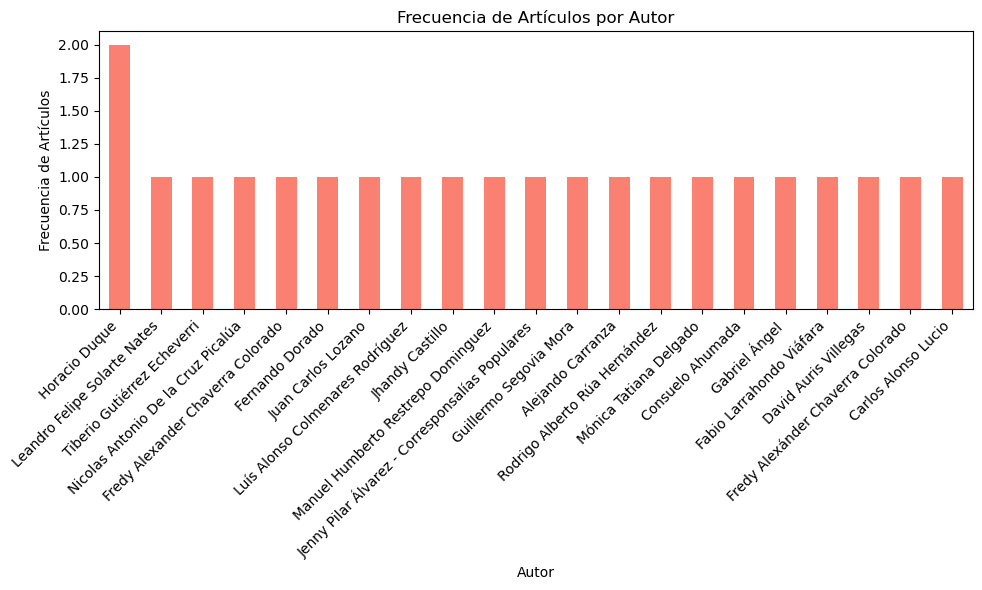

In [32]:
# Gráfica 2: Frecuencia de artículos por autor
plt.figure(figsize=(10, 6))
df['Autor'].value_counts().plot(kind='bar', color='salmon')
plt.xlabel('Autor')
plt.ylabel('Frecuencia de Artículos')
plt.title('Frecuencia de Artículos por Autor')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [4]:
from datetime import datetime

# Diccionario de meses en español a inglés
meses = {
    'enero': 'January', 'febrero': 'February', 'marzo': 'March',
    'abril': 'April', 'mayo': 'May', 'junio': 'June',
    'julio': 'July', 'agosto': 'August', 'septiembre': 'September',
    'octubre': 'October', 'noviembre': 'November', 'diciembre': 'December'
}

# Función para convertir la fecha
def convertir_fecha(fecha):
    # Reemplaza el mes en español con el mes en inglés
    for espanol, ingles in meses.items():
        if espanol in fecha:
            fecha = fecha.replace(espanol, ingles)
            break
    # Convertir a formato datetime
    try:
        return pd.to_datetime(fecha, format='%B %d, %Y')
    except ValueError as e:
        print(f"Error al convertir la fecha: {fecha} - {e}")
        return None

# Aplicar la conversión de fechas
df['Fecha de Publicación'] = df['Fecha de Publicación'].apply(convertir_fecha)


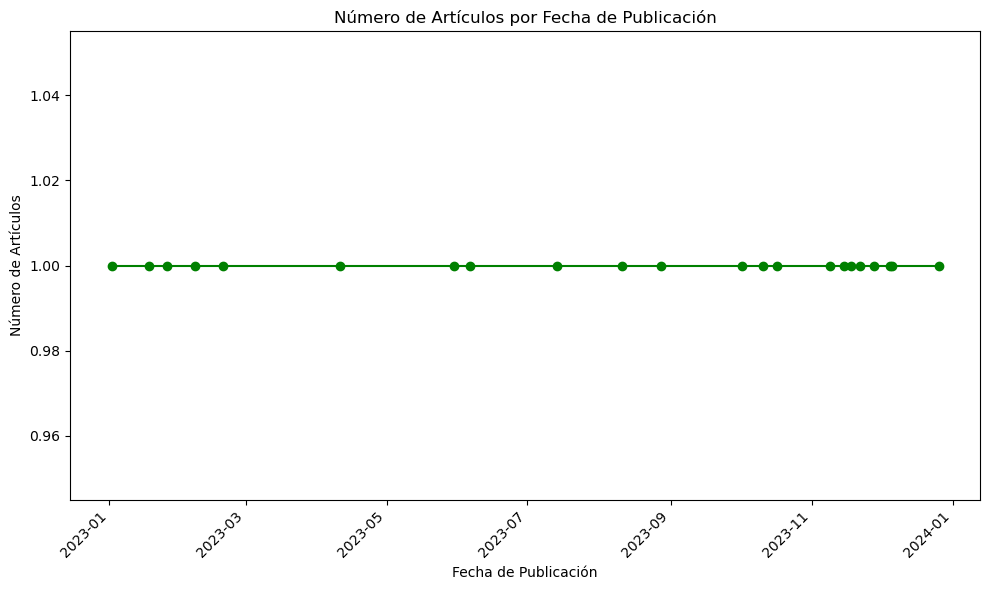

In [5]:
# Gráfica 3: Artículos por Fecha de Publicación
plt.figure(figsize=(10, 6))
df['Fecha de Publicación'].value_counts().sort_index().plot(kind='line', marker='o', linestyle='-', color='green')
plt.xlabel('Fecha de Publicación')
plt.ylabel('Número de Artículos')
plt.title('Número de Artículos por Fecha de Publicación')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [6]:
# Escribir los datos extraídos en un archivo CSV
with open('datos_extraidoslas2orillas_descriptivo.csv', 'w', newline='', encoding='utf-8-sig') as archivo:
    escritor_csv = csv.writer(archivo)
    # Escribir la cabecera
    escritor_csv.writerow(["Autor", "Fecha de Publicación", "Número de Palabras", "Nombre del Periódico"])
    # Escribir los datos
    for index, row in df.iterrows():
        escritor_csv.writerow(row)

In [54]:
df['Fecha de Publicación']

0    2023-12-26
1    2023-12-06
2    2023-02-07
3    2023-10-02
4    2023-11-15
5    2023-10-11
6    2023-05-30
7    2023-11-09
8    2023-08-28
9    2023-11-18
10   2023-01-02
11   2023-01-18
12   2023-11-28
13   2023-01-26
14   2023-12-05
15   2023-06-06
16   2023-10-17
17   2023-11-22
18   2023-04-11
19   2023-08-11
20   2023-07-14
21   2023-02-19
Name: Fecha de Publicación, dtype: datetime64[ns]